In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
import pylab as pl
import pandas as pd
%matplotlib inline

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# X_train, X_val = np.load("/content/drive/My Drive/Hyperspectral Data/npy_file/X_train.npy"), np.load("/content/drive/My Drive/Hyperspectral Data/npy_file/X_val.npy")
# y_train, y_val = np.load("/content/drive/My Drive/Hyperspectral Data/npy_file/y_train.npy"), np.load("/content/drive/My Drive/Hyperspectral Data/npy_file/y_val.npy") 


X_train, X_val = np.load("/content/drive/My Drive/npy_file/X_train.npy"), np.load("/content/drive/My Drive/npy_file/X_val.npy")
y_train, y_val = np.load("/content/drive/My Drive/npy_file/y_train.npy"), np.load("/content/drive/My Drive/npy_file/y_val.npy") 


In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [8]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37890, 204), (8931, 204), (37890,), (8931,))

## **SVM**

In [0]:
from sklearn import svm

In [0]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X_train, y_train)

In [0]:
y_pred = svc.predict(X_val)

In [0]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.913223603179935


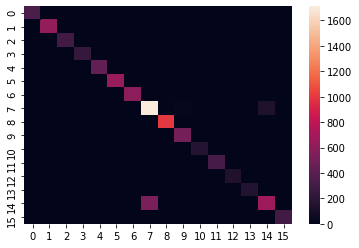

In [0]:
sns.heatmap(confusion_matrix(y_val, y_pred))

## **DECISION TREE**

In [0]:
import graphviz

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X = X_train, y = y_train)
y_pred_tree = clf.predict(X_val)
print("Accuracy of Decision tree:",metrics.accuracy_score(y_val, y_pred_tree))


Accuracy of Decision tree: 0.9192699585712686


In [0]:
from sklearn.tree import ExtraTreeClassifier
clf1 = tree.ExtraTreeClassifier()
clf1.fit(X = X_train, y = y_train)
y_pred_etree = clf1.predict(X_val)
print("Accuracy of Extra tree:",metrics.accuracy_score(y_val, y_pred_etree))



Accuracy of Extra tree: 0.9082969432314411


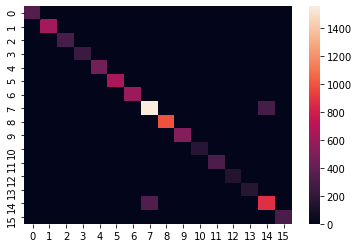

In [0]:
sns.heatmap(confusion_matrix(y_val, y_pred_tree))

## **RANDOM FOREST**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_randomforest = classifier.predict(X_val)
print("Accuracy of Random Forest:",metrics.accuracy_score(y_val, y_pred_randomforest))




Accuracy of Random Forest: 0.9423356846937633


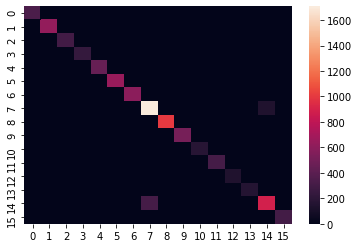

In [0]:
sns.heatmap(confusion_matrix(y_val, y_pred_randomforest))

# **NAIVE BAYES**

In [0]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X = X_train, y = y_train)
y_pred_gnb = clf.predict(X_val)
print("Accuracy of Gaussian Naive Bayes:",metrics.accuracy_score(y_val, y_pred_gnb))


Accuracy of Gaussian Naive Bayes: 0.7699025864964729


In [0]:
 from sklearn.naive_bayes import BernoulliNB
 clf = BernoulliNB()
clf.fit(X = X_train, y = y_train)
y_pred_bnb = clf.predict(X_val)
print("Accuracy of Bernoulli Naive Bayes:",metrics.accuracy_score(y_val, y_pred_bnb))


Accuracy of Bernoulli Naive Bayes: 0.6627477326167283


# **Neighbours**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X = X_train, y = y_train)
y_pred_knn = clf.predict(X_val)
print("Accuracy of KNN:",metrics.accuracy_score(y_val, y_pred_knn))



Accuracy of KNN: 0.905945582801478


# **PCA and LDA**

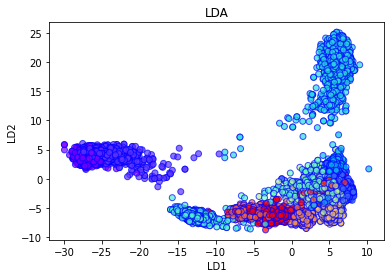

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train) 
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [0]:
lda.explained_variance_ratio_

array([0.47639898, 0.17775127])

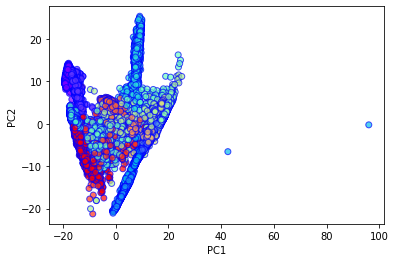

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train, y_train) 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


In [0]:
pca.explained_variance_ratio_

array([0.66743803, 0.27473953])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lda, y_train, random_state=1)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train1, y_train1)
y_pred = dt.predict(X_test1)
confusion_matrix(y_test1, y_pred)
print("Accuracy of LDA implemented Decision Tree:",metrics.accuracy_score(y_test1, y_pred))


Accuracy of LDA implemented Decision Tree: 0.6559695978042859


In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y_train, random_state=1)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train1, y_train1)
y_pred = dt.predict(X_test1)
confusion_matrix(y_test1, y_pred)
print("Accuracy of PCA implemented Decision Tree:",metrics.accuracy_score(y_test1, y_pred))

Accuracy of PCA implemented Decision Tree: 0.8333157394700729


In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lda, y_train, random_state=1)
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train1, y_train1)
y_pred_randomforest2 = classifier.predict(X_test1)
print("Accuracy of LDA implemented Random Forest:",metrics.accuracy_score(y_test1, y_pred_randomforest2))

Accuracy of LDA implemented Random Forest: 0.6843660931067244


In [0]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train1, y_train1)
y_pred_randomforest1 = classifier.predict(X_test1)
print("Accuracy of PCA implemented Random Forest:",metrics.accuracy_score(y_test1, y_pred_randomforest1))

Accuracy of PCA implemented Random Forest: 0.6843660931067244


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

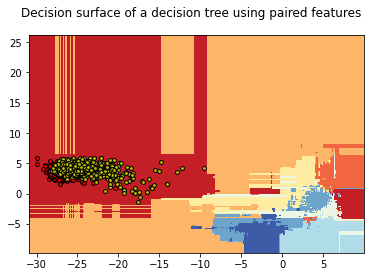

<Figure size 432x288 with 0 Axes>

In [0]:
#drawing the decision boundary
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02
x_min, x_max = X_train1[:, 0].min() - 1, X_train1[:, 0].max() + 1
y_min, y_max = X_train1[:, 1].min() - 1, X_train1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train1 == i)
    plt.scatter(X_train1[idx, 0], X_train1[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()

# **MLP**

In [0]:
from sklearn.neural_network import MLPClassifier
classs = MLPClassifier()
classs.fit(X = X_train, y = y_train)
y_pred_mlp = classs.predict(X_val)
print("Accuracy of MLP:",metrics.accuracy_score(y_val, y_pred_mlp))

Accuracy of MLP: 0.9612585376777516


In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y_train, random_state=1)
dt = MLPClassifier()
dt.fit(X_train1, y_train1)
y_pred = dt.predict(X_test1)
confusion_matrix(y_test1, y_pred)
print("Accuracy of PCA implemented MLP NN:",metrics.accuracy_score(y_test1, y_pred))

Accuracy of PCA implemented MLP NN: 0.8287765227488652


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn.ensemble import AdaBoostClassifier
classs = AdaBoostClassifier()
classs.fit(X = X_train, y = y_train)
y_pred_abc = classs.predict(X_val)
print("Accuracy of AdaBoost:",metrics.accuracy_score(y_val, y_pred_abc))


Accuracy of AdaBoost: 0.5881760161236144


In [0]:
bdt_real = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train1, y_train1)
bdt_discrete.fit(X_train1, y_train1)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test1), bdt_discrete.staged_predict(X_test1)):
    real_test_errors.append(metrics.accuracy_score(real_test_predict, y_test1))
    discrete_test_errors.append(metrics.accuracy_score(discrete_train_predict, y_test1))
  



# **Feature importance by ExtraTreesClassifier**

Feature ranking:
1. feature 12 (0.011108)
2. feature 14 (0.011015)
3. feature 17 (0.010581)
4. feature 9 (0.009609)
5. feature 18 (0.009121)
6. feature 11 (0.009069)
7. feature 13 (0.008466)
8. feature 6 (0.008400)
9. feature 8 (0.008382)
10. feature 159 (0.008218)
11. feature 16 (0.008113)
12. feature 41 (0.008032)
13. feature 156 (0.008007)
14. feature 10 (0.007926)
15. feature 45 (0.007709)
16. feature 184 (0.007684)
17. feature 15 (0.007657)
18. feature 188 (0.007589)
19. feature 25 (0.007540)
20. feature 49 (0.007463)
21. feature 44 (0.007365)
22. feature 7 (0.007320)
23. feature 5 (0.007300)
24. feature 24 (0.007249)
25. feature 48 (0.007143)
26. feature 195 (0.007103)
27. feature 80 (0.006994)
28. feature 189 (0.006977)
29. feature 27 (0.006962)
30. feature 47 (0.006947)
31. feature 4 (0.006904)
32. feature 22 (0.006804)
33. feature 19 (0.006710)
34. feature 192 (0.006620)
35. feature 179 (0.006600)
36. feature 20 (0.006588)
37. feature 55 (0.006586)
38. feature 193 (0.006559)
3

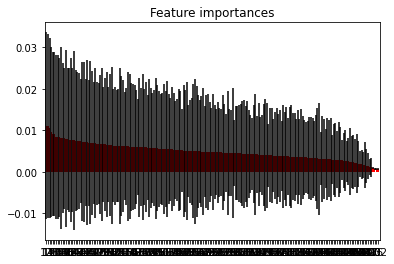

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# **Results**
**Accuracy of** : 

MLP - 96.025 <br>
Random Forest - 94.23 <br>
SVM - 93.22 <br>
Decision Tree - 92.05 <br>
KNN - 90.59 <br>
Extra Tree - 90.78 <br>
PCA implemented Random Forest - 84.74612055315106 <br>
PCA implemented Decision Tree - 83.18 <br>
PCA implemented MLP - 83.299 <br>

LDA implemented Random Forest - 68.43 <br>
LDA implemented Decision Tree - 65.72 <br>

Bernoulli Naive Bayes - 66.27 <br>
Gaussian Naive Bayes - 76.99 <br>

**According to the Feature_importance of Extra Trees Classifier, the 5 most important features are notably-**
1. feature 12 (0.011108)
2. feature 14 (0.011015)
3. feature 17 (0.010581)
4. feature 9 (0.009609)
5. feature 18 (0.009121)
